We will be using Python to analyze our data

First we import our libraries and import our dataset

In [289]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import our dataset

In [290]:
from sklearn.datasets import load_wine

wine = load_wine()

Get data keys

In [291]:
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In order to understand this dataset better we will check the description

In [292]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                          1.36  3.23    2.36  0.27\

Convert to pandas DataFrame format

In [293]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

Check all dataframe feature names

In [294]:
print(df.keys())

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


Show the first 5 rows of dataframe

In [295]:
print(df.head(5))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

We want to get the whole picture, so we expand the df.head to show all columns

In [296]:
pd.set_option('display.max_columns', None)
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

Checking the shape of the entire dataset

In [297]:
print(df.shape)

(178, 13)


This shows that this dataset has 178 observations and 13 columns

Since the values of the dataset are not equally scaled we need to apply z-score standardization to get all features into the same scale. 
For this, we use Scikit-learn StandardScaler() class which is in the preprocessing submodule in Scikit-learn.

Import Class

In [298]:
from sklearn.preprocessing import StandardScaler

Create object and store in variable Scaler

In [299]:
scaler = StandardScaler()

Using fit to calculate Mean and Standard Deviation

In [ ]:
scaler.fit(df)

Transform values and store into df_scaled

In [301]:
df_scaled = scaler.transform(df)

Now we are ready to apply PCA to our dataset.

In [302]:
from sklearn.decomposition import PCA

Now we apply PCA with the original number of dimensions to see how well PCA captures the variance of the data

In [303]:
PCA_13 = PCA(n_components=13)
PCA_13.fit(df_scaled)
DF_PCA_13 = PCA_13.transform(df_scaled)

Since we have set n_components = 13 which is the original number of dimensions in our dataset
The % variance explained by 13 components should be 100%

In [304]:
sum(PCA_13.explained_variance_ratio_*100)

100.00000000000001

The explained_variance_ratio_ attribute of PCA returns an array which has the values of the percentage of variance explained by each of the components

In [305]:
PCA_13.explained_variance_ratio_*100

array([36.1988481 , 19.20749026, 11.12363054,  7.06903018,  6.56329368,
        4.93582332,  4.23867932,  2.68074895,  2.2221534 ,  1.93001909,
        1.73683569,  1.29823258,  0.79521489])

In the array above, we can see that there are 13 components.
The first variable alone captures 36.19% of the variability in the dataset and the second variable captures 19.21% of the variability in the dataset by itself and so on.

If we get the cumulative sum of the array we can see the following

In [306]:
np.cumsum(PCA_13.explained_variance_ratio_ * 100)

array([ 36.1988481 ,  55.40633836,  66.52996889,  73.59899908,
        80.16229276,  85.09811607,  89.3367954 ,  92.01754435,
        94.23969775,  96.16971684,  97.90655253,  99.20478511,
       100.        ])

Then we create the following plot for better visualization

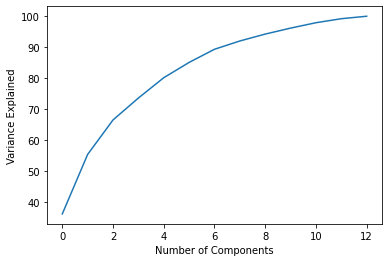

In [307]:
plt.plot(np.cumsum(PCA_13.explained_variance_ratio_ * 100))
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.savefig('elbow_plot.png', dpi=100)

By looking at this plot, we can see the following.

In [308]:
print("Variance explained by the First principal component =", np.cumsum(PCA_13.explained_variance_ratio_ * 100)[0])
print("Variance explained by the First two principal components =", np.cumsum(PCA_13.explained_variance_ratio_ * 100)[1])
print("Variance explained by the First four principal components =", np.cumsum(PCA_13.explained_variance_ratio_ * 100)[3])
print("Variance explained by the First six principal components =", np.cumsum(PCA_13.explained_variance_ratio_ * 100)[5])
print("Variance explained by the First eight principal components =", np.cumsum(PCA_13.explained_variance_ratio_ * 100)[7])
print("Variance explained by the First ten principal components =", np.cumsum(PCA_13.explained_variance_ratio_ * 100)[9])

Variance explained by the First principal component = 36.19884809992633
Variance explained by the First two principal components = 55.406338356935294
Variance explained by the First four principal components = 73.59899907589929
Variance explained by the First six principal components = 85.09811607477045
Variance explained by the First eight principal components = 92.01754434577262
Variance explained by the First ten principal components = 96.16971684450642


You can see that the first six components keep about 85% of the variability while reducing 7 (54%) features in the dataset. That is good since the remaining 7 features only contain around 15% of the variability in the data.

Now we apply PCA to our dataset with n_components=2. 
This will project the data into a two-dimensional subspace and return 2 components that capture 55.41% of the variability in data

In [309]:
PCA_2 = PCA(n_components=2)
PCA_2.fit(df_scaled)
DF_PCA_2 = PCA_2.transform(df_scaled)

Here we check the new shape of the dataset

In [310]:
DF_PCA_2.shape

(178, 2)

As you can see, the dimensionality reduced from 13 to 2

Now we confirm the three object classes that the data was evaluating

In [311]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

These classes are the three different type of wine that were mentioned at the beginning of this project in the description of the dataset.

Now we create a 2d scatterplot of the data using the two principal components

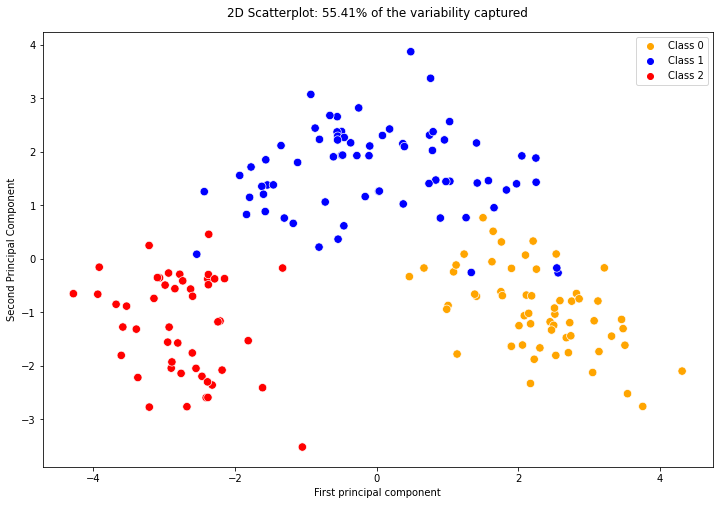

In [312]:
plt.figure(figsize=(12,8))
az = sns.scatterplot(x=DF_PCA_2[:, 0],y=DF_PCA_2[:, 1], s=70,
        hue=wine.target, palette=['orange', 'blue', 'red'])
legend_labels, _= az.get_legend_handles_labels()
az.legend(legend_labels, ['Class 0', 'Class 1', 'Class 2'])
plt.title("2D Scatterplot: 55.41% of the variability captured", pad=15)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.savefig("2d_scatterplot.png")

Now lets try to apply PCA to our dataset with n_components=3. This will turn our data into a three-dimensional subspace. This will have 3 components that capture 66.53% of the variability in data.

In [315]:
print("Variance explained by the First three principal components =", np.cumsum(PCA_13.explained_variance_ratio_ * 100)[2])

Variance explained by the First three principal components = 66.52996889318526


Apply PCA with 3 components

In [317]:
pca_3 = PCA(n_components=3)
pca_3.fit(df_scaled)
df_pca_3 = pca_3.transform(df_scaled)

Now we make a 3d scatterplot of the data using the three components

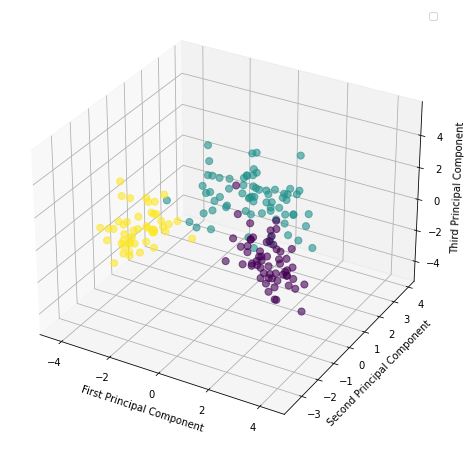

In [335]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Class 0', 'Class 1', 'Class 2'])

sct = ax.scatter3D(df_pca_3[:, 0], df_pca_3[:, 1], df_pca_3[:, 2], 
    c = wine.target, s=50, alpha=0.6)
ax.set_xlabel('First Principal Component',)
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.savefig("3d_scatterplot.png")


We can also do the opposite and see how many components are needed to reach 95% variability

Here we will set n_components = 0.95. This will select the necessary number of components while preserving 95% of the variability.

In [343]:
PCA_90 = PCA(n_components=.90)
PCA_90.fit(df_scaled)
DF_PCA_90 = PCA_90.transform(df_scaled)

In [344]:
DF_PCA_90.shape

(178, 8)

This means that the algorithm found 8 principal components which preserves 90% of the variability in the data.

We can better visualize this using the following graph

Text(0.5, 1.0, 'Tranformed data from the principal components at 90% Variability')

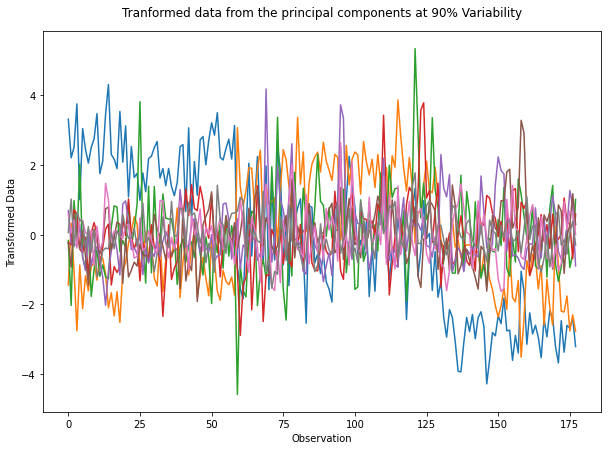

In [346]:
plt.figure(figsize=(10,7))
plt.plot(DF_PCA_90)
plt.xlabel('Observation')
plt.ylabel('Transformed Data')
plt.title('Tranformed data from the principal components at 90% Variability', pad=15)

As you can see, this graph has 178 observations and closely follows the shape of our dataset. This graph represents the correlation between the features and the principal components.

When we compare this with the original dataset that has 13 features, this contains only 8 features but retains 90% of the variability in the data. That means that we reduced our features by almost 40% while still retaining a significant portion of the variability in data. This reduction will allow algorithms to run more efficiently and effectively and keep only the necessary amount of components